# Test de hipótesis

In [1]:
import pandas as pd
#pip install Seaborn biblioteca para analisis estadisticos por medio de grafiscos de diseños
#variados y coloridos
import seaborn as sns
tarjetas=pd.read_csv('credit_card_ESP_rangoEdad.csv')

In [2]:
# Una persona analiza nuestra base de datos y considera que deberíamos 
# agrupar la columna de iu, porque considera que más adelante podríamos 
# cruzarla con otras informaciones de forma más eficiente.
# Nos recomienda separarla en 4 grupos:
bins = [0, 0.25, 0.50, 0.75, 1]
nombres = ['0%-25%', '25%-50%', '50%-75%', '75%-100%']
tarjetas['rango_iu'] = pd.cut(tarjetas['iu'], bins, labels=nombres)

In [3]:
tarjetas.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad,rango_iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30,0%-25%
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30,0%-25%
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40,0%-25%
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40,75%-100%
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30,75%-100%


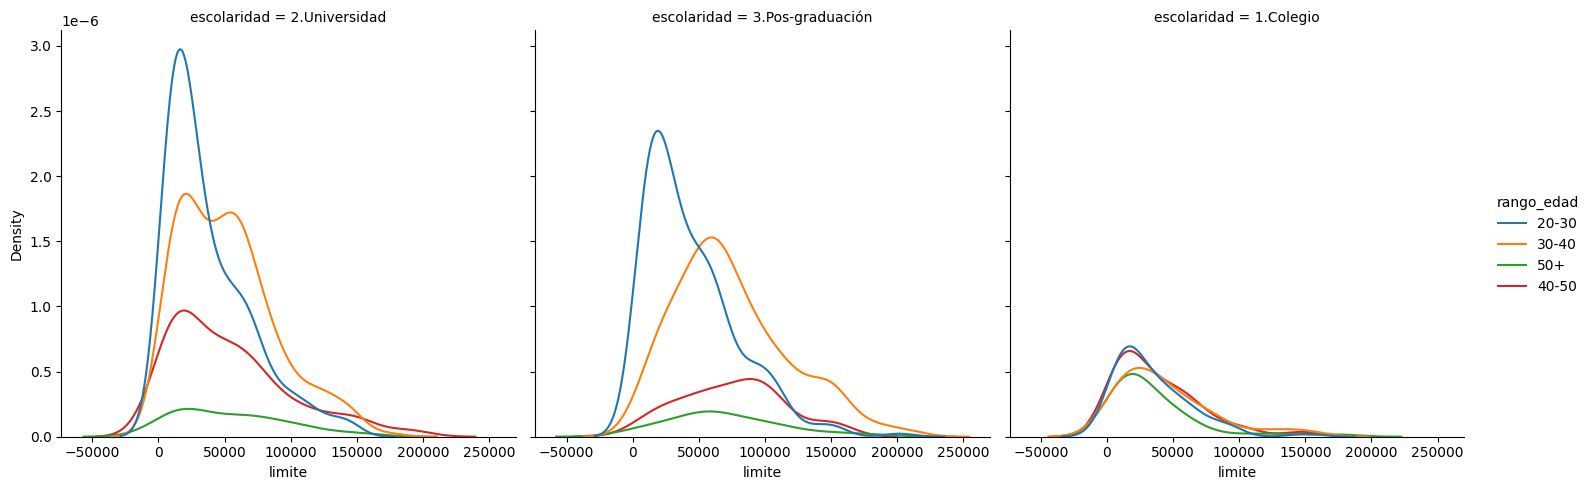

In [4]:
sns.displot(x='limite', col='escolaridad', data=tarjetas, kind='kde', hue='rango_edad')

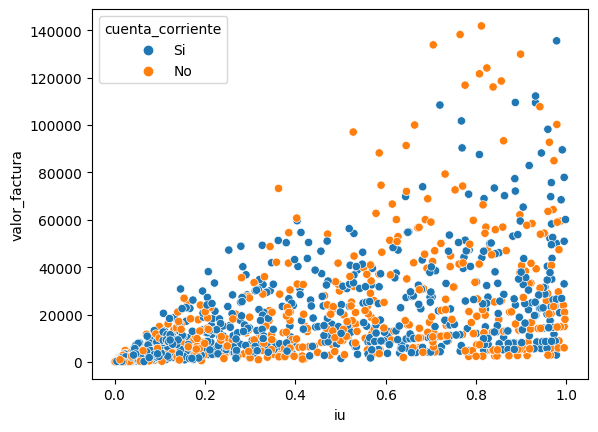

In [5]:
#Gráfico de dispercion
sns.scatterplot(x='iu', y='valor_factura', data=tarjetas, hue='cuenta_corriente');

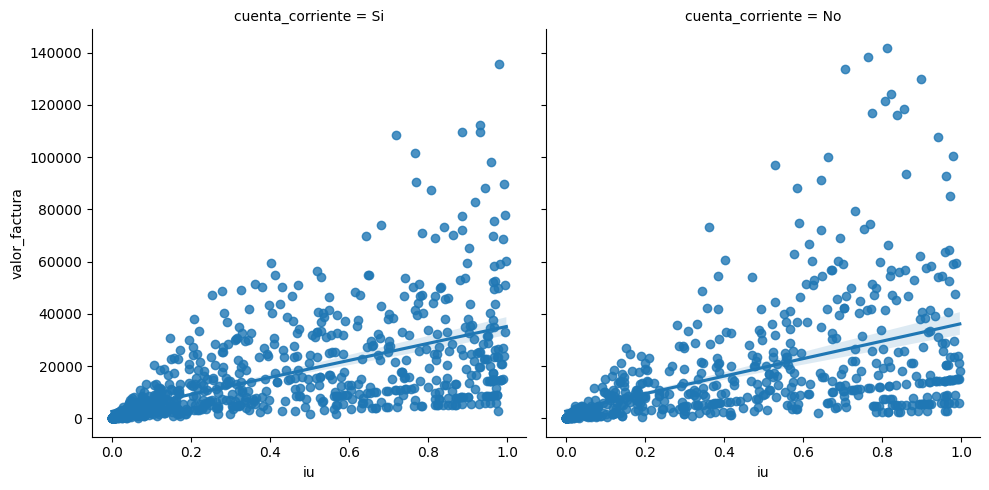

In [6]:
#Gráfico de dispercion
sns.lmplot(x='iu', y='valor_factura', data=tarjetas, col='cuenta_corriente')

In [7]:
from scipy.stats import ranksums
#pip install cipy para poder importar la libreria

H<sup>null<sup> Hipótesis nula:

La distribuición de los grupos moroso y no moroso es la misma

H<sup>alt<sup> Hipótesis alternativa:

La distribuición de los grupos moroso y no moroso no es la misma

In [8]:
moroso = tarjetas.query("moroso == 1").valor_factura
#retorna a la variable "moroso" el valor de quienes si son mororos

In [9]:
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: valor_factura, Length: 117, dtype: float64

In [10]:
no_moroso = tarjetas.query("moroso == 0").valor_factura
#retorna a la variable "moroso" el valor de quienes no son mororos

In [11]:
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: valor_factura, Length: 1383, dtype: float64

In [12]:
resultado = ranksums(moroso, no_moroso)
resultado#La distribuición de los grupos moroso y no moroso no es la misma

RanksumsResult(statistic=-2.562530598426702, pvalue=0.010391243081223555)

In [13]:
print("El p_value de nuestro test es {}".format(resultado.pvalue))

El p_value de nuestro test es 0.010391243081223555


In [17]:
tarjetas.to_csv('credit_card_ESP_completo.csv', sep = ',', index = False)
#importando los cambios efectuados a la traduccion de la tabla
tarjetas

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad,rango_iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30,0%-25%
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30,0%-25%
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40,0%-25%
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40,75%-100%
4,150550,No,3.Pos-graduación,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30,75%-100%
...,...,...,...,...,...,...,...,...,...,...,...
1495,54198,Si,3.Pos-graduación,Soltero/a,27,295.0780,0.0000,1,0.005444,20-30,0%-25%
1496,45165,No,2.Universidad,Casado/a,55,23637.8555,1144.1800,0,0.523367,50+,50%-75%
1497,78286,No,3.Pos-graduación,Soltero/a,34,962.9178,962.9178,0,0.012300,30-40,0%-25%
1498,6022,No,2.Universidad,Casado/a,44,864.7592,864.7592,0,0.143600,40-50,0%-25%
